In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('PERSIANN_200301_202204 kuchinapudi m.csv')

In [3]:
df.head()

,time,Rain
0,2003-01-01,1.79
1,2003-02-01,0.00
2,2003-03-01,24.08
3,2003-04-01,15.98
4,2003-05-01,162.56


In [4]:
df.tail()

,time,Rain
227,2021-12-01,0.28
228,2022-01-01,0.00
229,2022-02-01,0.00
230,2022-03-01,0.00
231,2022-04-01,0.83


In [5]:
df.columns=["time","Rain"]
df.head()

,time,Rain
0,2003-01-01,1.79
1,2003-02-01,0.00
2,2003-03-01,24.08
3,2003-04-01,15.98
4,2003-05-01,162.56


In [6]:
df['time']=pd.to_datetime(df['time'])

In [7]:
df.head()

,time,Rain
0,2003-01-01,1.79
1,2003-02-01,0.00
2,2003-03-01,24.08
3,2003-04-01,15.98
4,2003-05-01,162.56


In [8]:
df.set_index('time',inplace=True)

In [9]:
df.head()

,Rain
time,
2003-01-01,1.79
2003-02-01,0.00
2003-03-01,24.08
2003-04-01,15.98
2003-05-01,162.56


In [10]:
df.describe()

,Rain
count,232.000000
mean,127.753578
std,146.801476
min,0.000000
25%,1.487500
50%,91.655000
75%,209.865000
max,686.760000


<AxesSubplot:xlabel='time'>

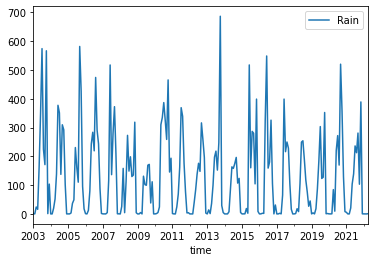

In [11]:
df.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(df['Rain'])

In [14]:
def adfuller_test(Rain):
    result=adfuller(Rain)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adfuller_test(df['Rain'])

ADF Test Statistic : -3.486237943998951
p-value : 0.008347647559591245
#Lags Used : 11
Number of Observations Used : 220
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [16]:
df['Sales First Difference'] = df['Rain'] - df['Rain'].shift(1)

In [17]:
df['Rain'].shift(1)

time
2003-01-01       NaN
2003-02-01      1.79
2003-03-01      0.00
2003-04-01     24.08
2003-05-01     15.98
               ...  
2021-12-01    389.04
2022-01-01      0.28
2022-02-01      0.00
2022-03-01      0.00
2022-04-01      0.00
Name: Rain, Length: 232, dtype: float64

In [18]:
df['Seasonal First Difference']=df['Rain']-df['Rain'].shift(12)

In [19]:
df.head(14)

,Rain,Sales First Difference,Seasonal First Difference
time,,,
2003-01-01,1.79,NaN,NaN
2003-02-01,0.00,-1.79,NaN
2003-03-01,24.08,24.08,NaN
2003-04-01,15.98,-8.10,NaN
2003-05-01,162.56,146.58,NaN
2003-06-01,350.12,187.56,NaN
2003-07-01,574.31,224.19,NaN
2003-08-01,224.22,-350.09,NaN
2003-09-01,171.23,-52.99,NaN


In [20]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.140621797543701
p-value : 7.987776808816178e-08
#Lags Used : 11
Number of Observations Used : 208
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='time'>

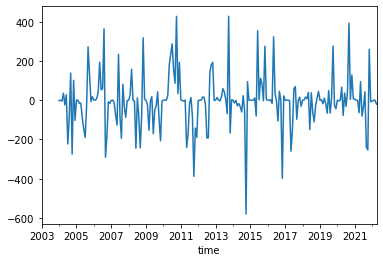

In [21]:
df['Seasonal First Difference'].plot()

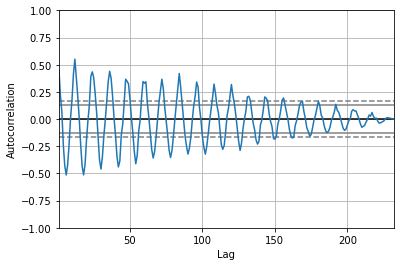

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Rain'])
plt.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

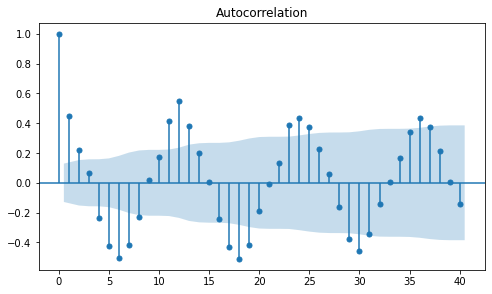

In [24]:
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Rain'].iloc[1:],lags=40,ax=ax1)

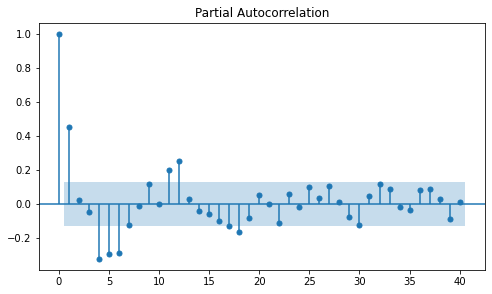

In [25]:
fig = plt.figure(figsize=(8,10))
ax2 = fig.add_subplot(211)
fig = plot_pacf(df['Rain'].iloc[1:],lags=40,ax=ax2)

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model=ARIMA(df['Rain'],order=(1,1,0))
model_fit=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS 

In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Rain   No. Observations:                  231
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1480.376
Method:                       css-mle   S.D. of innovations            146.852
Date:                Wed, 18 May 2022   AIC                           2966.752
Time:                        15:40:13   BIC                           2977.079
Sample:                    02-01-2003   HQIC                          2970.917
                         - 04-01-2022                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0033      7.485     -0.000      1.000     -14.674      14.667
ar.L1.D.Rain    -0.2921      0.063     -4.656      0.000      -0.415      -0.169
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.4234           +0.0000j            3.4234            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='time'>

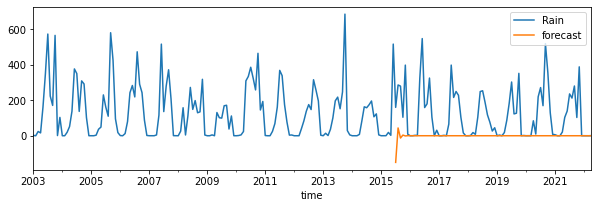

In [29]:
df['forecast']=model_fit.predict(start=150,end=231,dynamic=True)
df[['Rain','forecast']].plot(figsize=(10,3))

In [30]:
import statsmodels.api as sm

In [31]:
model=sm.tsa.statespace.SARIMAX(df['Rain'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\IJ1327\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='time'>

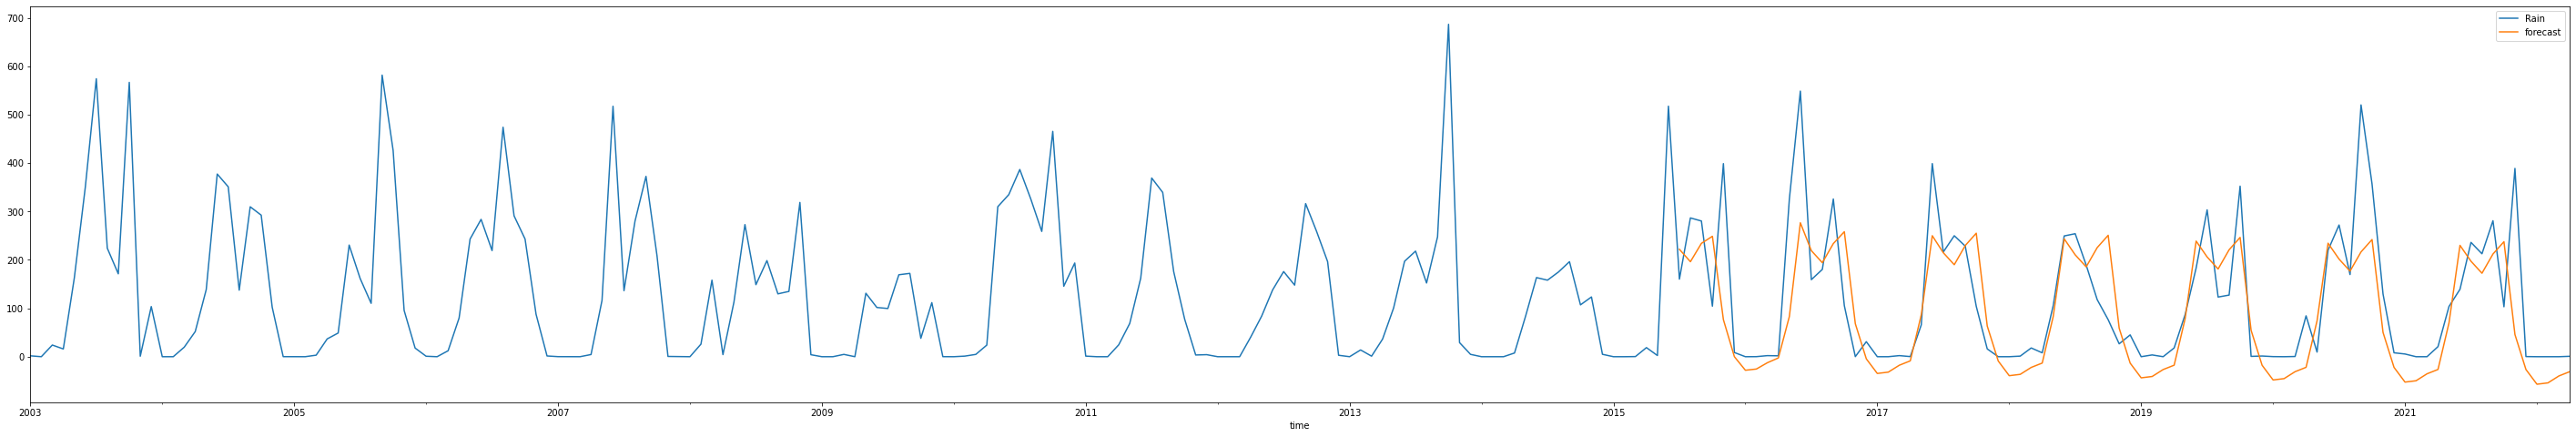

In [32]:
df['forecast']=results.predict(start=150,end=231,dynamic=True)
df[['Rain','forecast']].plot(figsize=(50,8))

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,60)]

In [34]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [35]:
future_datest_df.tail()

,Rain,Sales First Difference,Seasonal First Difference,forecast
2026-11-01,NaN,NaN,NaN,NaN
2026-12-01,NaN,NaN,NaN,NaN
2027-01-01,NaN,NaN,NaN,NaN
2027-02-01,NaN,NaN,NaN,NaN
2027-03-01,NaN,NaN,NaN,NaN


In [36]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

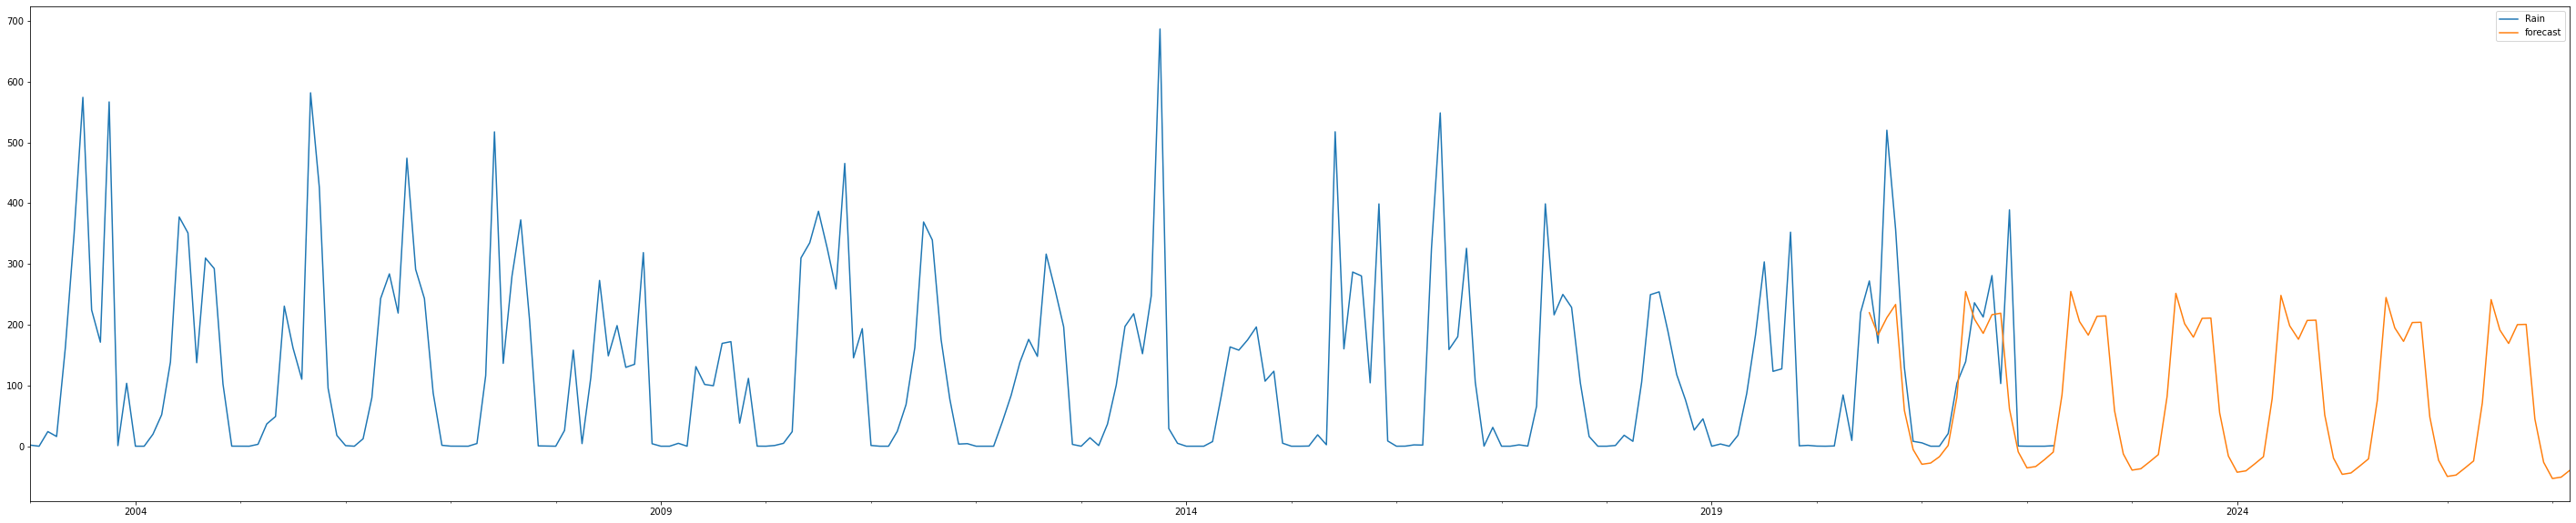

In [37]:
future_df['forecast'] = results.predict(start = 210, end = 291, dynamic= True)  
future_df[['Rain','forecast']].plot(figsize=(50,10))

In [38]:
future_df['forecast'].tail(60)

2022-04-01     -9.664892
2022-05-01     84.627461
2022-06-01    254.775243
2022-07-01    205.195582
2022-08-01    182.877350
2022-09-01    213.847916
2022-10-01    214.489929
2022-11-01     58.445641
2022-12-01    -12.695288
2023-01-01    -39.361333
2023-02-01    -37.090910
2023-03-01    -25.704126
2023-04-01    -13.824416
2023-05-01     81.849559
2023-06-01    251.667475
2023-07-01    201.685523
2023-08-01    179.483340
2023-09-01    210.474424
2023-10-01    210.944645
2023-11-01     55.050136
2023-12-01    -16.145815
2024-01-01    -42.831355
2024-02-01    -40.559049
2024-03-01    -29.163869
2024-04-01    -17.339372
2024-05-01     78.465211
2024-06-01    248.251944
2024-07-01    198.231963
2024-08-01    176.040750
2024-09-01    207.033774
2024-10-01    207.487755
2024-11-01     51.607404
2024-12-01    -19.593748
2025-01-01    -46.281131
2025-02-01    -44.008647
2025-03-01    -32.612673
2025-04-01    -20.793395
2025-05-01     75.023534
2025-06-01    244.807320
2025-07-01    194.783743
